# `20190111a` testing TOF measurements

In [27]:
import numpy as np
from scipy.signal import hilbert
from pyUn0 import *

Data acquired


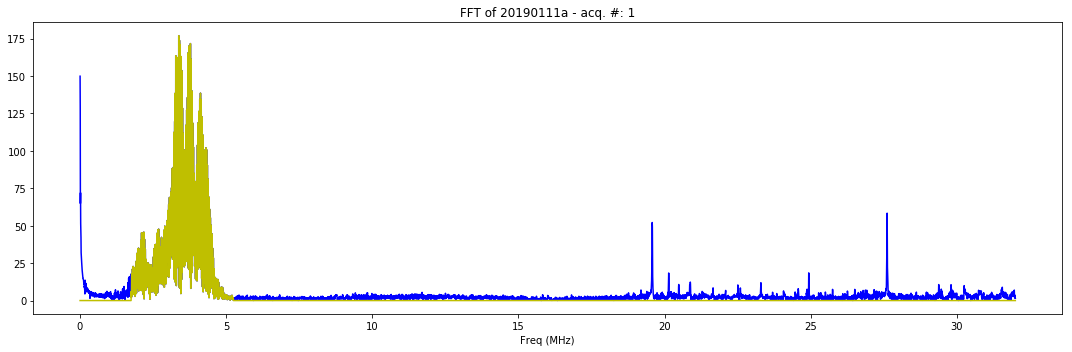

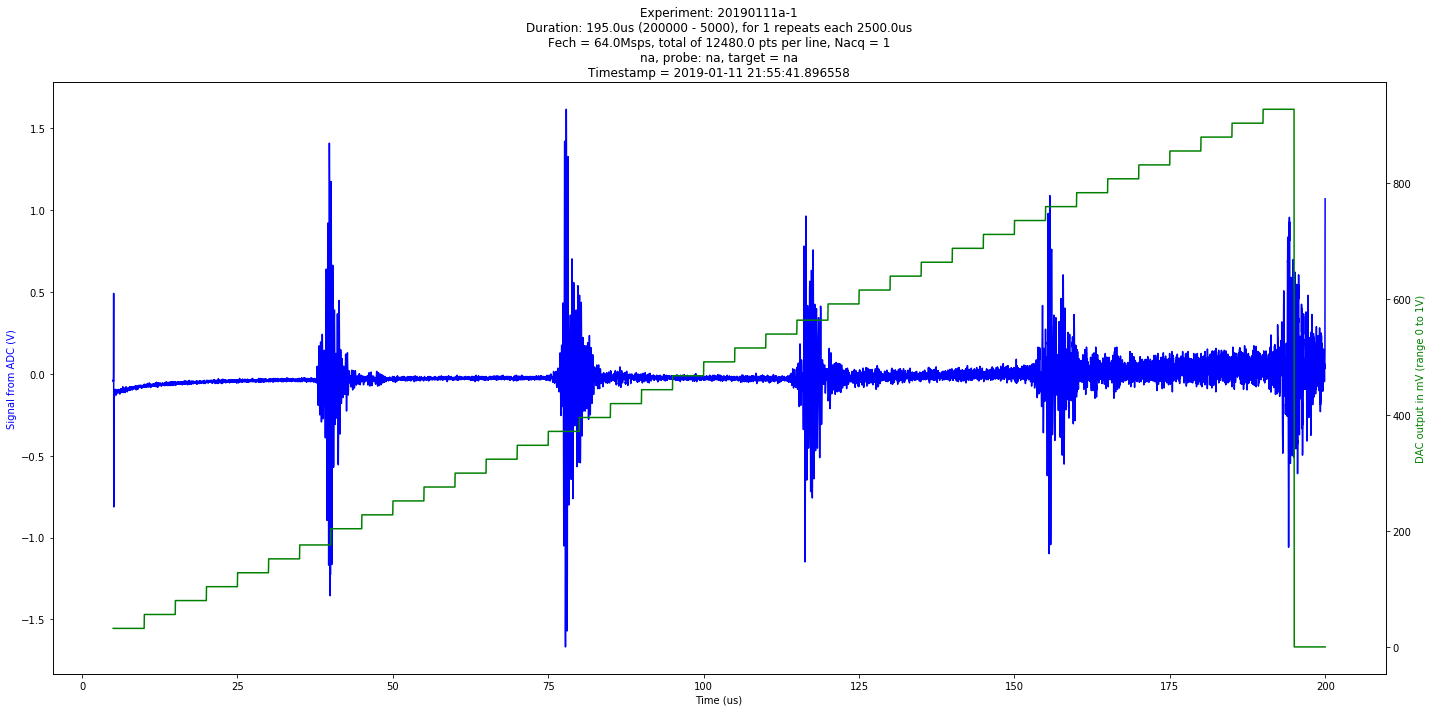

In [15]:
y = us_json()
y.JSONprocessing("./data/20190111a-1.json")
y.create_fft() 
y.save_npz() 
y.mkImg() 

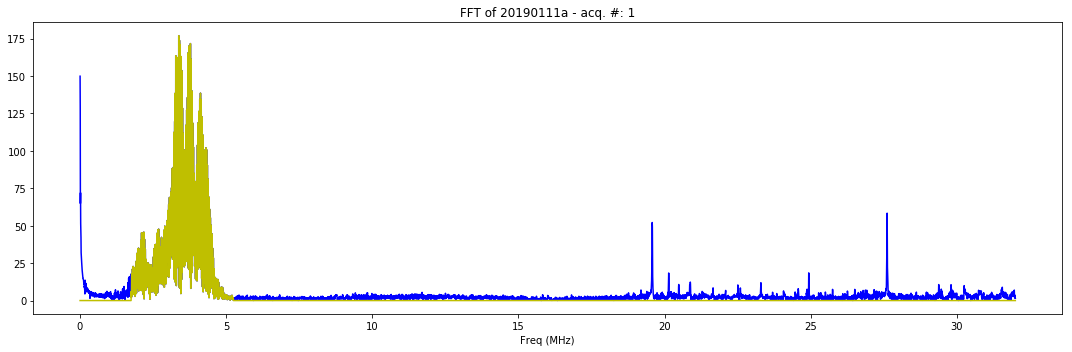

In [17]:
y.FFT_x = [X*y.f / (y.LengthT) for X in range(y.LengthT)]
y.FFT_y = np.fft.fft(y.tmp)
y.filtered_fft = np.fft.fft(y.tmp)

for k in range(y.LengthT/2 + 1):
    if k < (y.LengthT * y.fPiezo * 0.5 / y.f):
        y.filtered_fft[k] = 0
        y.filtered_fft[-k] = 0
    if k > (y.LengthT * y.fPiezo *1.5 / y.f):
        y.filtered_fft[k] = 0
        y.filtered_fft[-k] = 0

y.filtered_signal = np.real(np.fft.ifft(y.filtered_fft))

plt.figure(figsize=(15, 5))

plot_time = y.FFT_x[1:y.LengthT/2]
plot_abs_fft = np.abs(y.FFT_y[1:y.LengthT/2])
plot_filtered_fft = np.abs(y.filtered_fft[1:y.LengthT/2])
plt.plot(plot_time, plot_abs_fft, 'b-')
plt.plot(plot_time, plot_filtered_fft, 'y-')
plt.title("FFT of "+y.iD + " - acq. #: "+ str(y.N))
plt.xlabel('Freq (MHz)')
plt.tight_layout()
plt.show()

40.15625 2250 0.993141798985 1.02232073563
78.0625 4676 1.47565397698 1.5033211383
116.4375 7132 0.972466033372 1.00447547471
155.84375 9654 0.98091689784 1.00212491008
194.171875 12107 0.985282664084 1.0011922419


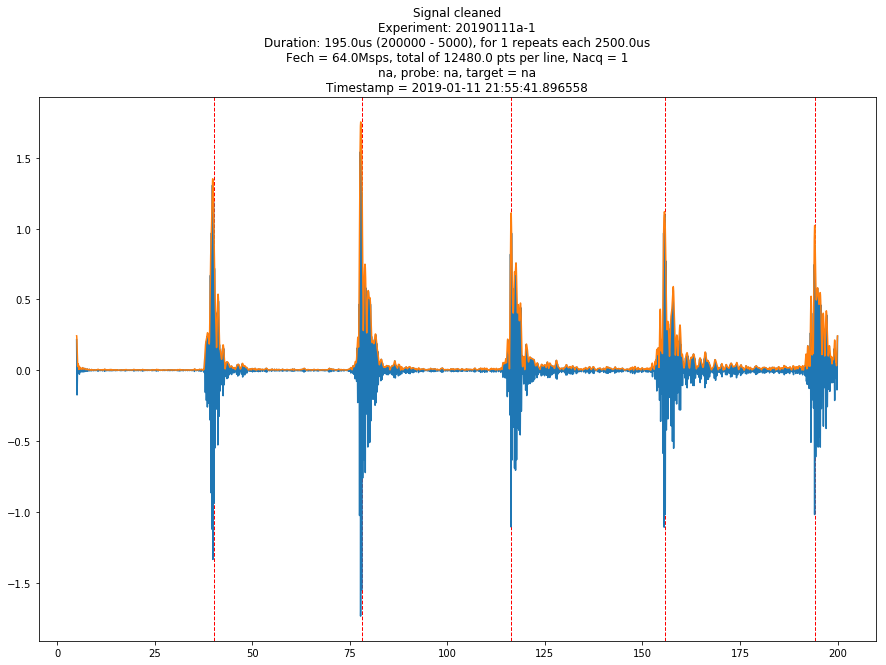

In [70]:
plt.figure(figsize=(15, 10))
y.cleaned = np.real(np.fft.ifft(y.filtered_fft))
y.hilbert = np.asarray(np.abs(hilbert(y.cleaned)))

WWIDTH = 64*5
y.MAX = []
y.T = []
Techoes = []
for k in range(len(y.t)-WWIDTH):
    y.MAX.append(max(y.hilbert[k:k+WWIDTH-1]))
    y.T.append(y.t[k]+WWIDTH)
for k in range(len(y.t)-WWIDTH-1):
    if int(y.MAX[k+1]*2) < int(2*y.MAX[k]):
        if (int(2*y.MAX[k]) == int(2*max(y.MAX[k-WWIDTH:k+WWIDTH]))):
            print y.t[k],k,y.MAX[k+1],y.MAX[k]
            plt.axvline(x= y.t[k] , linewidth=1, color='r', linestyle='dashed')
            Techoes.append(y.t[k])
plt.plot(y.t,y.cleaned)
plt.plot(y.t,y.hilbert)

plt.title("Signal cleaned\n"+y.create_title_text())
plt.show()

In [83]:
TOF = (Techoes[-1]-Techoes[0])/(len(Techoes)-1)
print TOF,"us -- representing",TOF/1450.0*1000*2,"mm path in water"

38.50390625 us -- representing 53.1088362069 mm path in water


# Check accuracy

In [91]:
for k in range(len(Techoes)-1):
    print "Measured TOF",Techoes[k+1]-Techoes[k],"Deviation:",TOF-(Techoes[k+1]-Techoes[k])," -> ", int(1000*(TOF-(Techoes[k+1]-Techoes[k]))/TOF)/10.0,"%"

Measured TOF 37.90625 Deviation: 0.59765625  ->  1.5 %
Measured TOF 38.375 Deviation: 0.12890625  ->  0.3 %
Measured TOF 39.40625 Deviation: -0.90234375  ->  -2.3 %
Measured TOF 38.328125 Deviation: 0.17578125  ->  0.4 %
